In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('games_smpl_attempts.csv', delimiter=';') 
df.head()

,uid,action,level,event_time
0,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
1,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
2,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
3,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640
4,elljQ2EySG03MDU0MTE3MTAyMTE3MA,failed,113,1512086924640


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22231214 entries, 0 to 22231213
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   uid         object
 1   action      object
 2   level       int64 
 3   event_time  int64 
dtypes: int64(2), object(2)
memory usage: 678.4+ MB


In [ ]:
# select those users for whom there is a history from the 1st level
df_right = df[df['level']==1].groupby(['uid'])['level'].count().reset_index()
df_right = df_right.drop(columns={'level'})
df = df.merge(df_right, how='inner', on='uid')
df.count()

uid           2372249
action        2372249
level         2372249
event_time    2372249
dtype: int64

In [ ]:
df['event_time'] = df['event_time'].astype(int)/1000
df['event_time'] = pd.to_datetime(df['event_time'], unit='s') 
df.head()

,uid,action,level,event_time
0,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,failed,9,2017-12-01 20:15:25.078000069
1,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,completed,8,2017-12-01 20:15:25.078000069
2,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,completed,7,2017-12-01 20:15:25.078000069
3,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,failed,7,2017-12-01 18:42:01.854000092
4,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,failed,7,2017-12-01 18:42:01.854000092


In [ ]:
df['date'] = df['event_time'].dt.date
df.head()

,uid,action,level,event_time,date
0,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,failed,9,2017-12-01 20:15:25.078000069,2017-12-01
1,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,completed,8,2017-12-01 20:15:25.078000069,2017-12-01
2,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,completed,7,2017-12-01 20:15:25.078000069,2017-12-01
3,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,failed,7,2017-12-01 18:42:01.854000092,2017-12-01
4,ajZkQU9zSDQ5Mzk0NjE3MTAyMjExMA,failed,7,2017-12-01 18:42:01.854000092,2017-12-01


In [ ]:
# Task 1
# Suggest a metric describing the difficulty of the levels and calculate it.

# The more difficult the level, the fewer users will pass it and make more unsuccessful attempts when passing the level. 

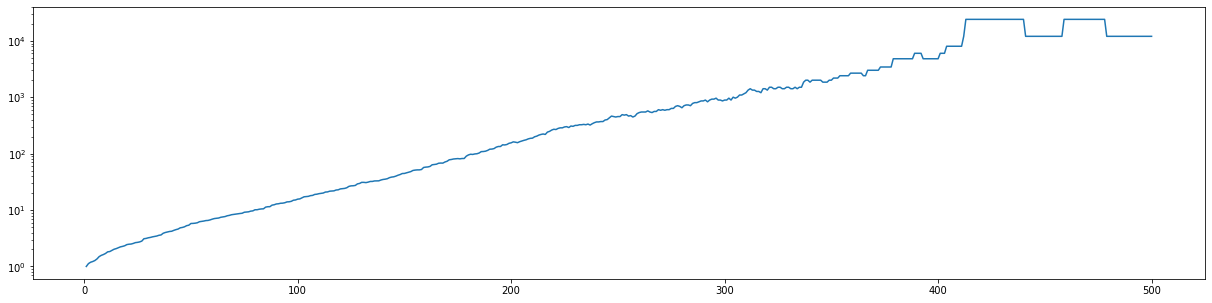

In [ ]:
# using the number of passed levels, calculate the 1st part of the metric
df_new = df[df['action']=='completed'].groupby(['level', 'uid'])['date'].count().reset_index()
df_completed = df_new.groupby(['level'])['uid'].count().reset_index()
df_completed['uid'] = 1/df_completed['uid']*max(df_completed['uid'])  
fig = plt.figure() 
ax = fig.add_subplot(111)   
fig.set_size_inches(21,5)
ax.plot(df_completed['level'], df_completed['uid'])
ax.set_yscale('log')  
plt.show()

In [ ]:
df_completed = df_completed.rename({'uid': 'compl_cnt'}, axis=1) 
df_completed.head()

,level,compl_cnt
0,1,1.000000
1,2,1.122798
2,3,1.187251
3,4,1.222397
4,5,1.272493


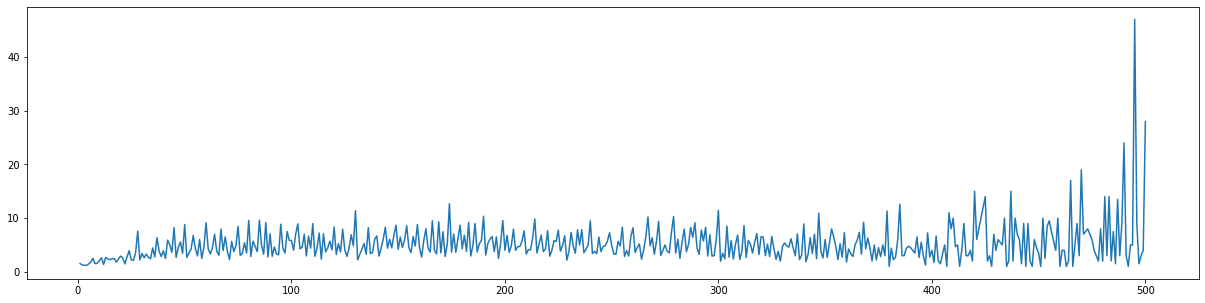

In [ ]:
# using the average number of unsuccessful attempts when the user passes the level, calculate the 2nd part of the metric
# you can see that after level 400, the number of unsuccessful attempts per user will increase
df_new = df[df['action']=='failed'].groupby(['level', 'uid'])['date'].count().reset_index()
df_failed = df_new.groupby(['level'])['date'].mean().reset_index()
fig = plt.figure() 
ax = fig.add_subplot(111)   
fig.set_size_inches(21,5)
ax.plot(df_failed['level'], df_failed['date'])
plt.show()

In [ ]:
df_failed = df_failed.rename({'date': 'fail_cnt'}, axis=1) 
df_failed.head()

,level,fail_cnt
0,1,1.545455
1,2,1.263261
2,3,1.214184
3,4,1.184713
4,5,1.457598


In [ ]:
# Level difficulty metric = Number of level passes (converted) * average number of unsuccessful attempts at level passes
# Difficulty is in the range [0; 1], where 0 is the easiest level and 1 is the hardest.

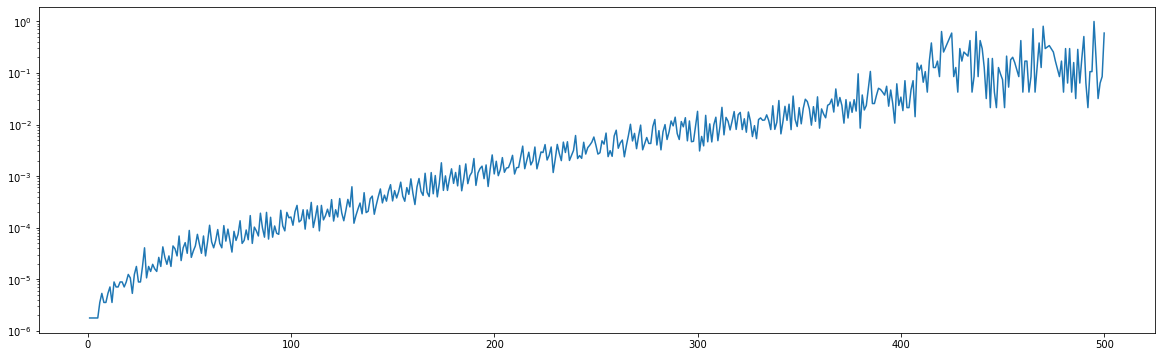

In [ ]:
df_all = df_completed.merge(df_failed, how='inner', on='level')
df_all['difficult'] = (df_all['compl_cnt']*df_all['fail_cnt']).astype(int)
df_all['difficult'] = df_all['difficult']/max(df_all['difficult'])
fig = plt.figure() 
ax = fig.add_subplot(111)   
fig.set_size_inches(20,6)
ax.plot(df_all['level'], df_all['difficult']) 
ax.set_yscale('log')  
plt.show()

In [ ]:
# Task 2
# Based on the results of the previous task, divide the levels into groups by difficulty and draw a conclusion about 
# the density of the location of difficult levels in the game.

# Levels, conditionally, can be divided into 3 stages: easy (1-50), medium (51-400) and heavy (401-500).
# With each passed level, the growth rate of the difficulty of the game decreases.
# It's hard to say with a difficult stage, since the number of passes varies between 1-5. Therefore, we will consider 
# it separately

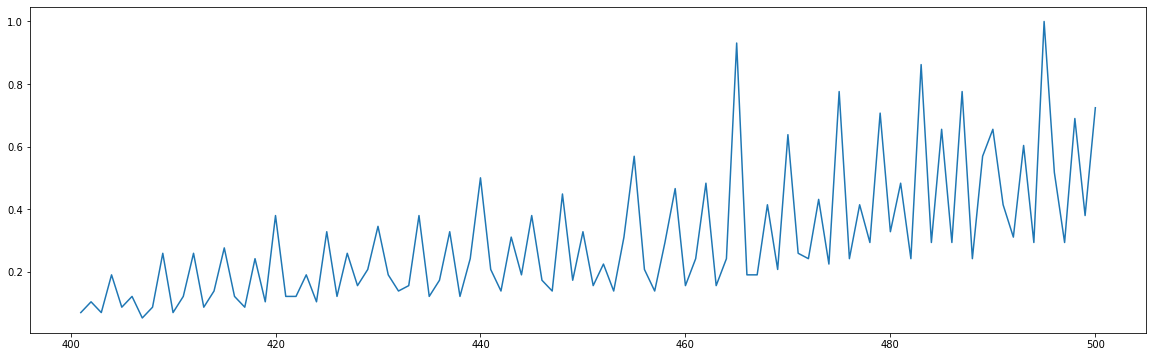

In [ ]:
# Let's select those users for whom there is a history from the 401st level.
# There is an increase in difficulty from level to level. At the same time, the maximum difficulty 
# of the game reaches the level of 495
df_hard = pd.read_csv('gdrive/My Drive/plr_smpl_attempts.csv', delimiter=';') 
df_hard = df_hard[df_hard['level']>=401]

df_hard_right = df_hard[df_hard['level']==401].groupby(['uid'])['level'].count().reset_index()
df_hard_right = df_hard_right.drop(columns={'level'})
df_hard = df_hard.merge(df_hard_right, how='inner', on='uid')
df_hard.count()

df_hard_new = df_hard[df_hard['action']=='completed'].groupby(['level', 'uid'])['event_time'].count().reset_index()
df_hard_completed = df_hard_new.groupby(['level'])['uid'].count().reset_index()
df_hard_completed['uid'] = 1/df_hard_completed['uid']*max(df_hard_completed['uid'])
df_hard_completed = df_hard_completed.rename({'uid': 'compl_cnt'}, axis=1) 

df_hard_new = df_hard[df_hard['action']=='failed'].groupby(['level', 'uid'])['event_time'].count().reset_index()
df_hard_failed = df_hard_new.groupby(['level'])['event_time'].mean().reset_index()
df_hard_failed = df_hard_failed.rename({'event_time': 'fail_cnt'}, axis=1) 

df_hard_all = df_hard_completed.merge(df_hard_failed, how='inner', on='level')
df_hard_all['difficult'] = (df_hard_all['compl_cnt']*df_hard_all['fail_cnt']).astype(int)
df_hard_all['difficult'] = df_hard_all['difficult']/max(df_hard_all['difficult'])
fig = plt.figure() 
ax = fig.add_subplot(111)   
fig.set_size_inches(20,6)
ax.plot(df_hard_all['level'], df_hard_all['difficult'])  
plt.show() 

In [ ]:
# Task 3
# Calculate a "funnel" of passing levels by a new user after installing the game.

In [ ]:
# the chart shows the calculation of the "funnel" of the passage of levels by a new user
df_new = df[df['action']=='completed'].groupby(['level', 'uid'])['date'].count().reset_index()
df_funnel = df_new.groupby(['level'])['uid'].count().reset_index()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Funnel(
    y = df_funnel['level'],
    x = df_funnel['uid'],
    textposition = "inside",
    textinfo = "value+percent previous",
    marker = {"color": "#1c1847"}),
    row=1, col=1)

fig.update_layout(showlegend=False,height=500, width=1200)
fig.show()